In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pylab as pl

In [2]:
countries = {
    'Korea, South': {'pop': 51.47e6},
    'Italy': {'pop': 60.48e6}, 
    'Iran': {'pop': 81.16e6}, 
    'US': {'pop': 327.2e6},
    'Spain': {'pop': 46.66e6},
    'France': {'pop': 66.99e6},
}

Korea, South


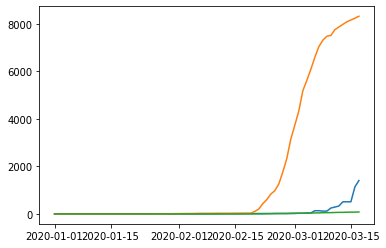

Italy


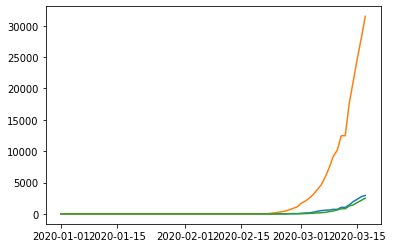

Iran


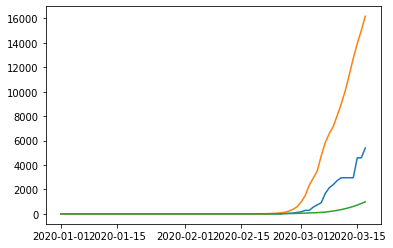

US


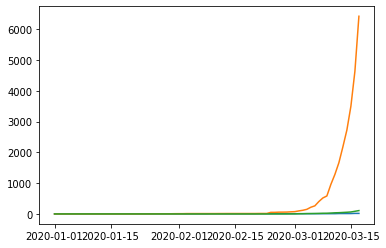

Spain


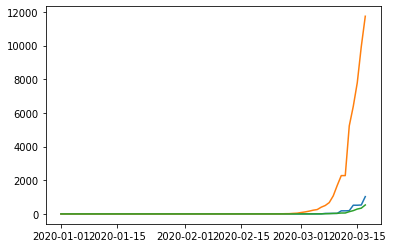

France


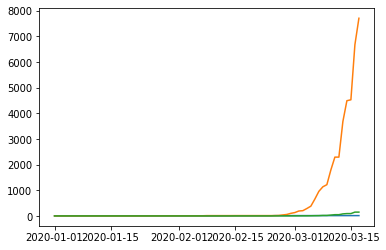

In [5]:
dfs = []
for country_name in countries.keys():
    print(country_name)
    states = ['recovered', 'confirmed', 'deaths']
    for state in states:
        df = pd.read_csv('data/{}.csv'.format(state))
        h = df[df['Country/Region'] == country_name]
        h = h.transpose().iloc[4:]
        h = h.sum(axis=1)
        h.columns = [state]
        dfs.append(h)
    country = pd.DataFrame(index=dfs[0].index)
    for df in dfs:
        country[df.columns[0]] = df

    # adding dates so that models can start earlier
    added = pd.DataFrame(0, index=['1/{}/20'.format(i) for i in range(1, 22)], columns=states)
    country = added.append(country)

    country.index = pd.to_datetime(country.index)

    plt.plot(country)
    plt.show()
    
    countries[country_name]['df'] = country

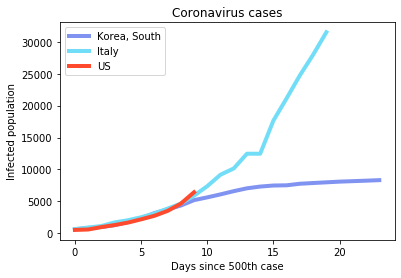

In [4]:
country_names = ['Korea, South', 'Italy', 'US']
graph_colors = ['#8093F1', '#72DDF7', '#ff4a2e']
for i in range(3):
    country_name = country_names[i]
    color = graph_colors[i]
    df = countries[country_name]['df']
    data = [x for x in df[df['confirmed'] >= 500]['confirmed']]
    pl.plot(data, marker='o', color=color, label=country_name, markersize=0, linewidth=4)
pl.legend(loc=0)
pl.title('Coronavirus cases'.format(country_name))
pl.xlabel('Days since 500th case')
pl.ylabel('Infected population')
pl.savefig('corona', dpi=900) # Saves the plot
pl.show()

# SEIR model

In [7]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return [S, E, I, R]

In [8]:
# Define parameters (these do not necessarily reflect COVID-19)
t_max = 250
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5

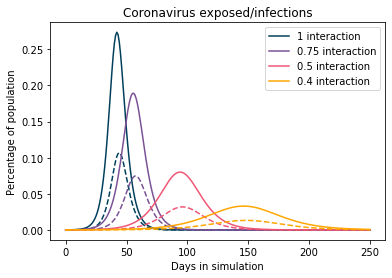

In [168]:
graph_colors = [
    '#003f5c',
    '#7a5195',
    '#ef5675',
    '#ffa600',
]

rhos = [1, .75, .5, .4]

for i in range(len(rhos)):
    rho = rhos[i]
    color = graph_colors[i]
    params = alpha, beta, gamma, rho
    # Run simulation
    results = seir_model_with_soc_dist(init_vals, params, t)
    pl.plot(results[1], color=color, label='{} interaction'.format(rho), linewidth=1.5)
    pl.plot(results[2], linestyle='dashed', color=color, linewidth=1.5)
    
pl.legend(loc=0)
pl.title('Coronavirus exposed/infections'.format(country_name))
pl.xlabel('Days in simulation')
pl.ylabel('Number of cases')
pl.xticks([])
pl.yticks([])
pl.savefig('corona_sim', dpi=900) # Saves the plot
pl.show()